# Threshold Diffusion on the UvA Co-authorship Network: Plotting

This notebook provides visualisations. Designed to work with the CSV outputs generated by `main.py`, in particular:

- `<prefix>_aggregate_all.csv`
- `<prefix>_mean_curves_all.csv`

The goal is to reproduce a set of figures:

1. Final adoption vs seed fraction for fixed threshold $\tau$
2. Final adoption vs threshold $\tau$ for fixed seed fraction
3. Heatmaps of final adoption over the $(\tau, s)$ parameter grid for each seeding strategy

(All code written to be LaTeX-compatible)

## Imports, setup and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import networkx as nx
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# LaTeX setup

rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman', 'Computer Modern Roman']
rcParams['text.usetex'] = False  # Set to True if you have LaTeX installed
rcParams['axes.labelsize'] = 12
rcParams['axes.titlesize'] = 14
rcParams['legend.fontsize'] = 10
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10

strategy_colors = {
    'random': '#5FFF6C',      
    'degree': '#FF5FA2',      
    'betweenness': '#5FF2FF'  
}

strategy_labels = {
    'random': 'Random Seeding',
    'degree': 'Degree Centrality',
    'betweenness': 'Betweenness Centrality'
}


In [3]:

per_run_df = pd.read_csv('ass2_per_run_all.csv')
aggregate_df = pd.read_csv('ass2_aggregate_all.csv')
ts_df = pd.read_csv('ass2_ts_all.csv')
mean_curves_df = pd.read_csv('ass2_mean_curves_all.csv')

strategies = ['random', 'degree', 'betweenness']
tau_values = sorted(aggregate_df['tau'].unique())
seed_fractions = sorted(aggregate_df['seed_fraction'].unique())

aggregate_df.head()


,strategy,mean_final_fraction,std_final_fraction,mean_n_steps,std_n_steps,mean_t_50,std_t_50,mean_t_90,std_t_90,mean_auc,std_auc,tau,seed_fraction
0,betweenness,1.0,0.0,10.0,0.000000,2.0,0.0,3.0,0.0,8.861869,0.000000,0.05,0.0025
1,degree,1.0,0.0,10.0,0.000000,2.0,0.0,3.0,0.0,8.887125,0.000000,0.05,0.0025
2,random,1.0,0.0,11.4,0.699206,4.0,0.0,5.0,0.0,8.232376,0.714926,0.05,0.0025
3,betweenness,1.0,0.0,10.0,0.000000,2.0,0.0,3.0,0.0,9.220316,0.000000,0.05,0.0050
4,degree,1.0,0.0,10.0,0.000000,2.0,0.0,3.0,0.0,9.155159,0.000000,0.05,0.0050


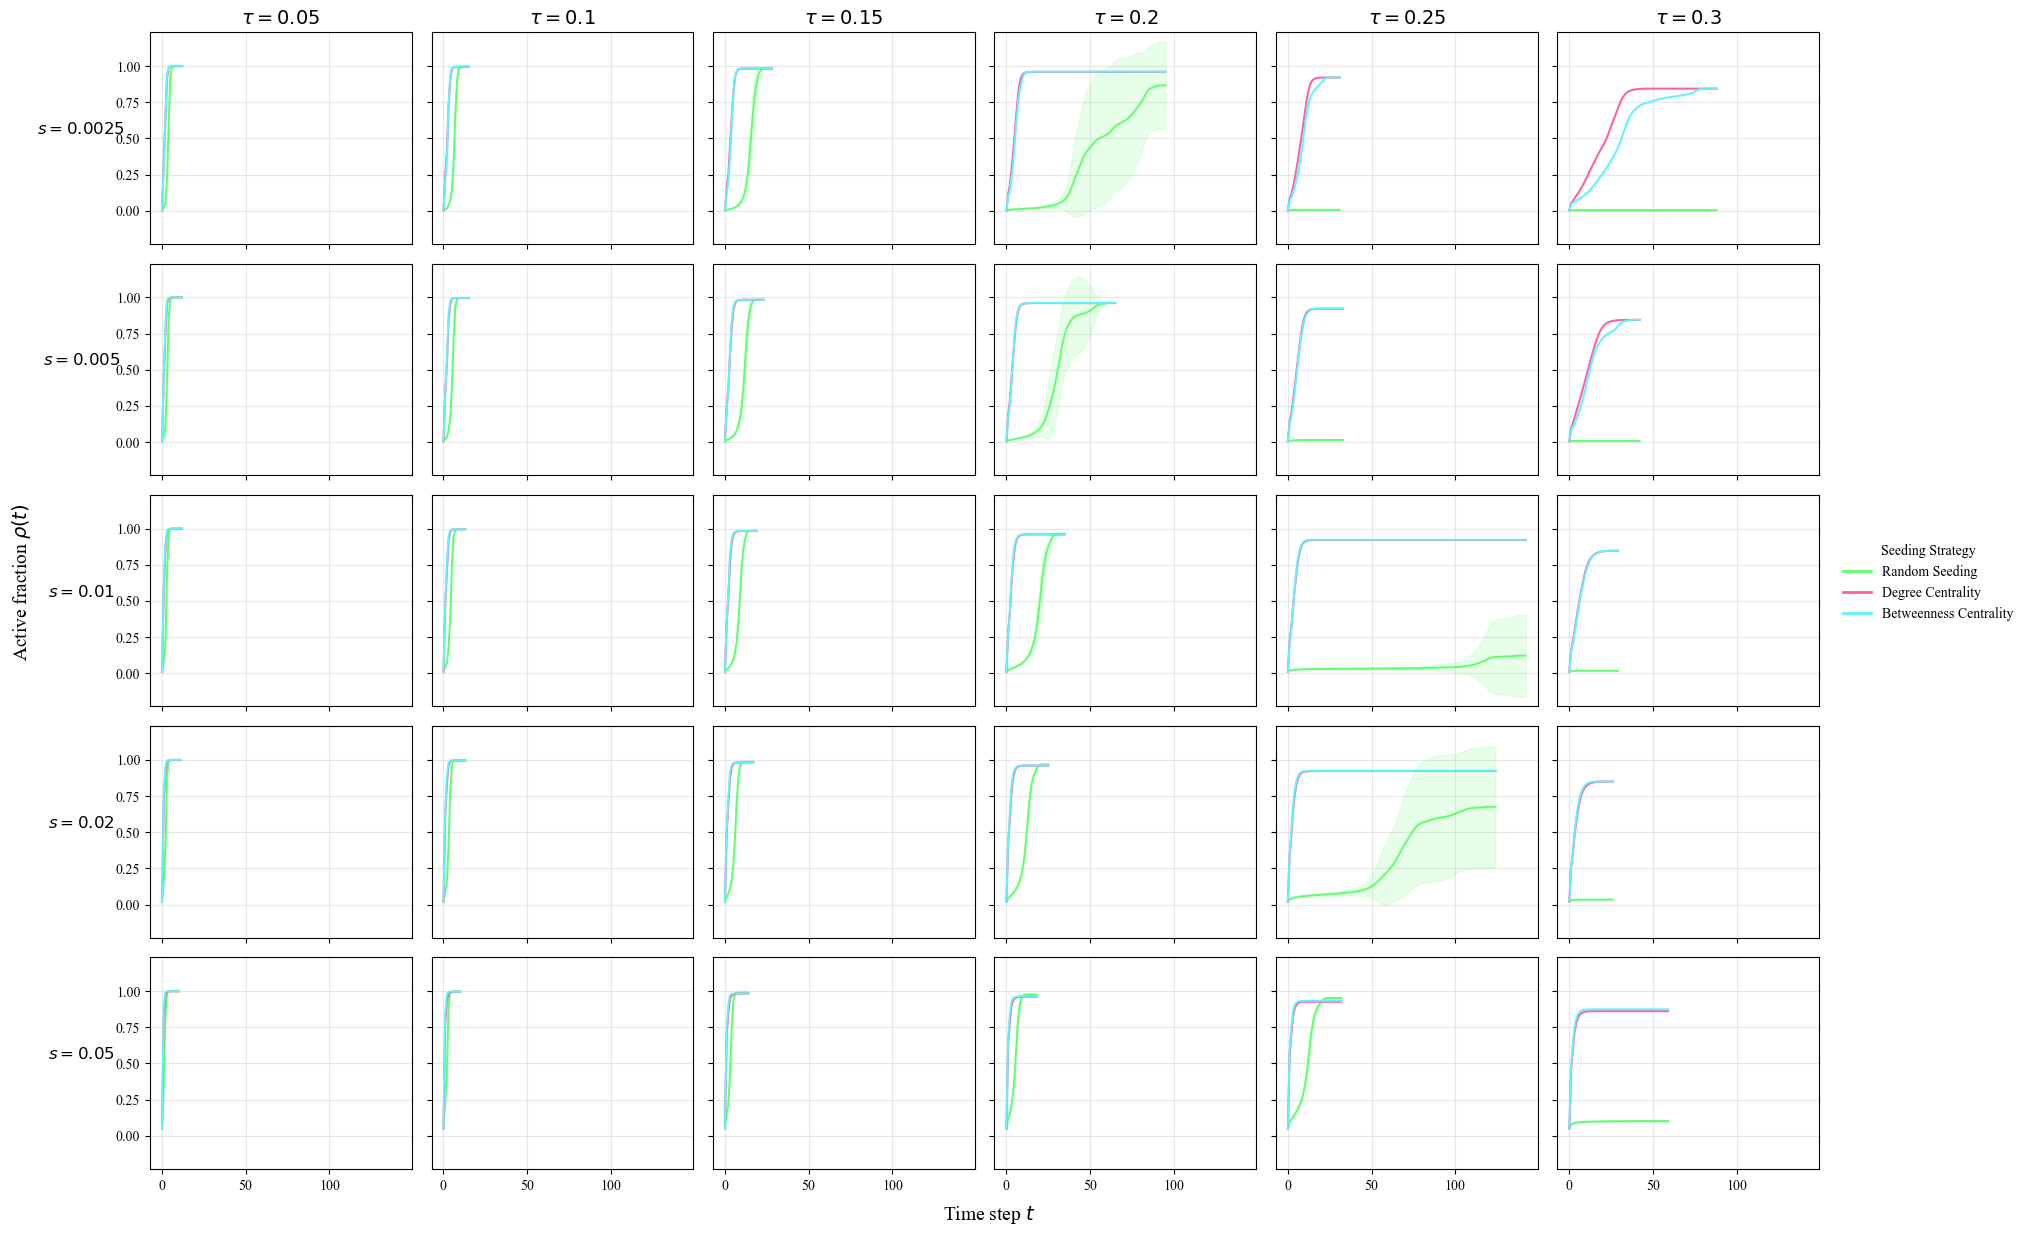

In [4]:
tau_values_to_plot = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30]

n_rows = len(seed_fractions)
n_cols = len(tau_values_to_plot)

fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(n_cols * 3.2, n_rows * 2.5),
    sharey=True,      
    sharex=True     
) 

for i, sf in enumerate(seed_fractions):
    for j, tau_val in enumerate(tau_values_to_plot):

        ax = axes[i, j]

        sub = mean_curves_df[
            (mean_curves_df['tau'] == tau_val) &
            (mean_curves_df['seed_fraction'] == sf)
        ]

        for strat in strategies:
            cur = sub[sub['strategy'] == strat].sort_values('time_step')

            ax.plot(
                cur['time_step'],
                cur['mean_fraction'],
                linewidth=1.4,
                color=strategy_colors[strat],
                label=strategy_labels[strat] if (i == 0 and j == 0) else None
            )

            ax.fill_between(
                cur['time_step'],
                cur['mean_fraction'] - cur['std_fraction'],
                cur['mean_fraction'] + cur['std_fraction'],
                color=strategy_colors[strat],
                alpha=0.15
            )

        # column titles = tau values
        if i == 0:
            ax.set_title(rf'$\tau={tau_val:g}$', fontsize=14)

        # row labels = seed fractions
        if j == 0:
            ax.set_ylabel(rf'$s={sf:g}$', rotation=0, labelpad=25, fontsize=12)

        ax.grid(alpha=0.3)

fig.text(0.5, -0.01, r'Time step $t$', ha='center', fontsize=14)
fig.text(-0.01, 0.5, r'Active fraction $\rho(t)$', va='center',
         rotation='vertical', fontsize=14)

handles = [
    plt.Line2D([0], [0], color=strategy_colors[s], lw=2)
    for s in strategies
]
labels = [strategy_labels[s] for s in strategies]

fig.legend(
    handles, labels,
    title='Seeding Strategy',
    loc='center right',
    bbox_to_anchor=(1.04, 0.5),
    frameon=False
)

plt.tight_layout(rect=[0, 0, 0.94, 0.97])
fig.savefig('adoption_curves_grid_tau_by_seed.png',
            dpi=300, bbox_inches='tight')
plt.show()


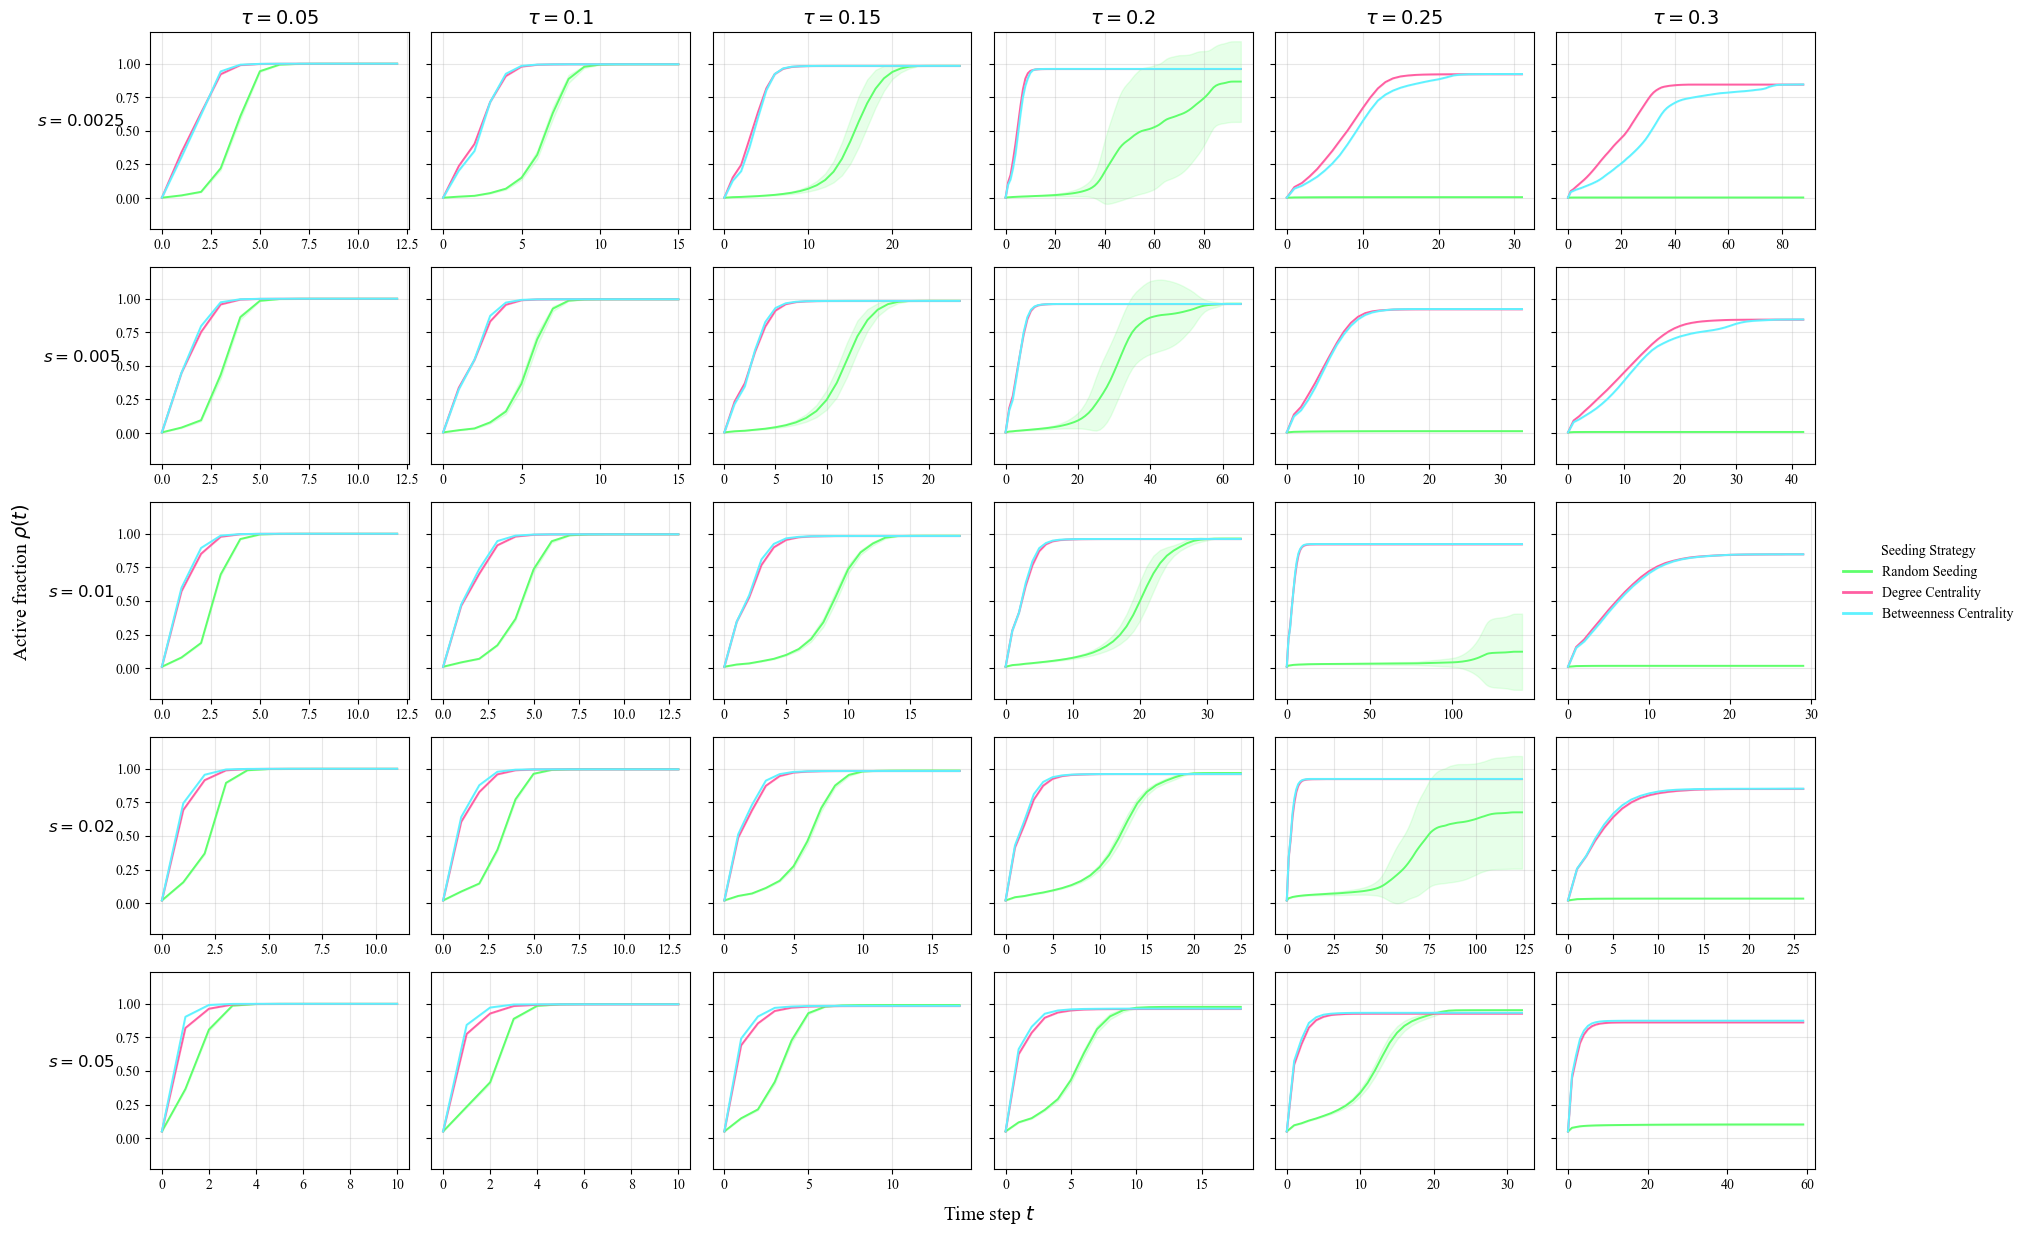

In [5]:
tau_values_to_plot = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30]

n_rows = len(seed_fractions)
n_cols = len(tau_values_to_plot)

fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(n_cols * 3.2, n_rows * 2.5),
    sharey=True,      
    sharex=False     
) 

for i, sf in enumerate(seed_fractions):
    for j, tau_val in enumerate(tau_values_to_plot):

        ax = axes[i, j]

        sub = mean_curves_df[
            (mean_curves_df['tau'] == tau_val) &
            (mean_curves_df['seed_fraction'] == sf)
        ]

        for strat in strategies:
            cur = sub[sub['strategy'] == strat].sort_values('time_step')

            ax.plot(
                cur['time_step'],
                cur['mean_fraction'],
                linewidth=1.4,
                color=strategy_colors[strat],
                label=strategy_labels[strat] if (i == 0 and j == 0) else None
            )

            ax.fill_between(
                cur['time_step'],
                cur['mean_fraction'] - cur['std_fraction'],
                cur['mean_fraction'] + cur['std_fraction'],
                color=strategy_colors[strat],
                alpha=0.15
            )

        # column titles = tau values
        if i == 0:
            ax.set_title(rf'$\tau={tau_val:g}$', fontsize=14)

        # row labels = seed fractions
        if j == 0:
            ax.set_ylabel(rf'$s={sf:g}$', rotation=0, labelpad=25, fontsize=12)

        ax.grid(alpha=0.3)

fig.text(0.5, -0.01, r'Time step $t$', ha='center', fontsize=14)
fig.text(-0.01, 0.5, r'Active fraction $\rho(t)$', va='center',
         rotation='vertical', fontsize=14)

handles = [
    plt.Line2D([0], [0], color=strategy_colors[s], lw=2)
    for s in strategies
]
labels = [strategy_labels[s] for s in strategies]

fig.legend(
    handles, labels,
    title='Seeding Strategy',
    loc='center right',
    bbox_to_anchor=(1.04, 0.5),
    frameon=False
)

plt.tight_layout(rect=[0, 0, 0.94, 0.97])
fig.savefig('adoption_curves_grid_tau_by_seed_varying_timescale.png',
            dpi=300, bbox_inches='tight')
plt.show()


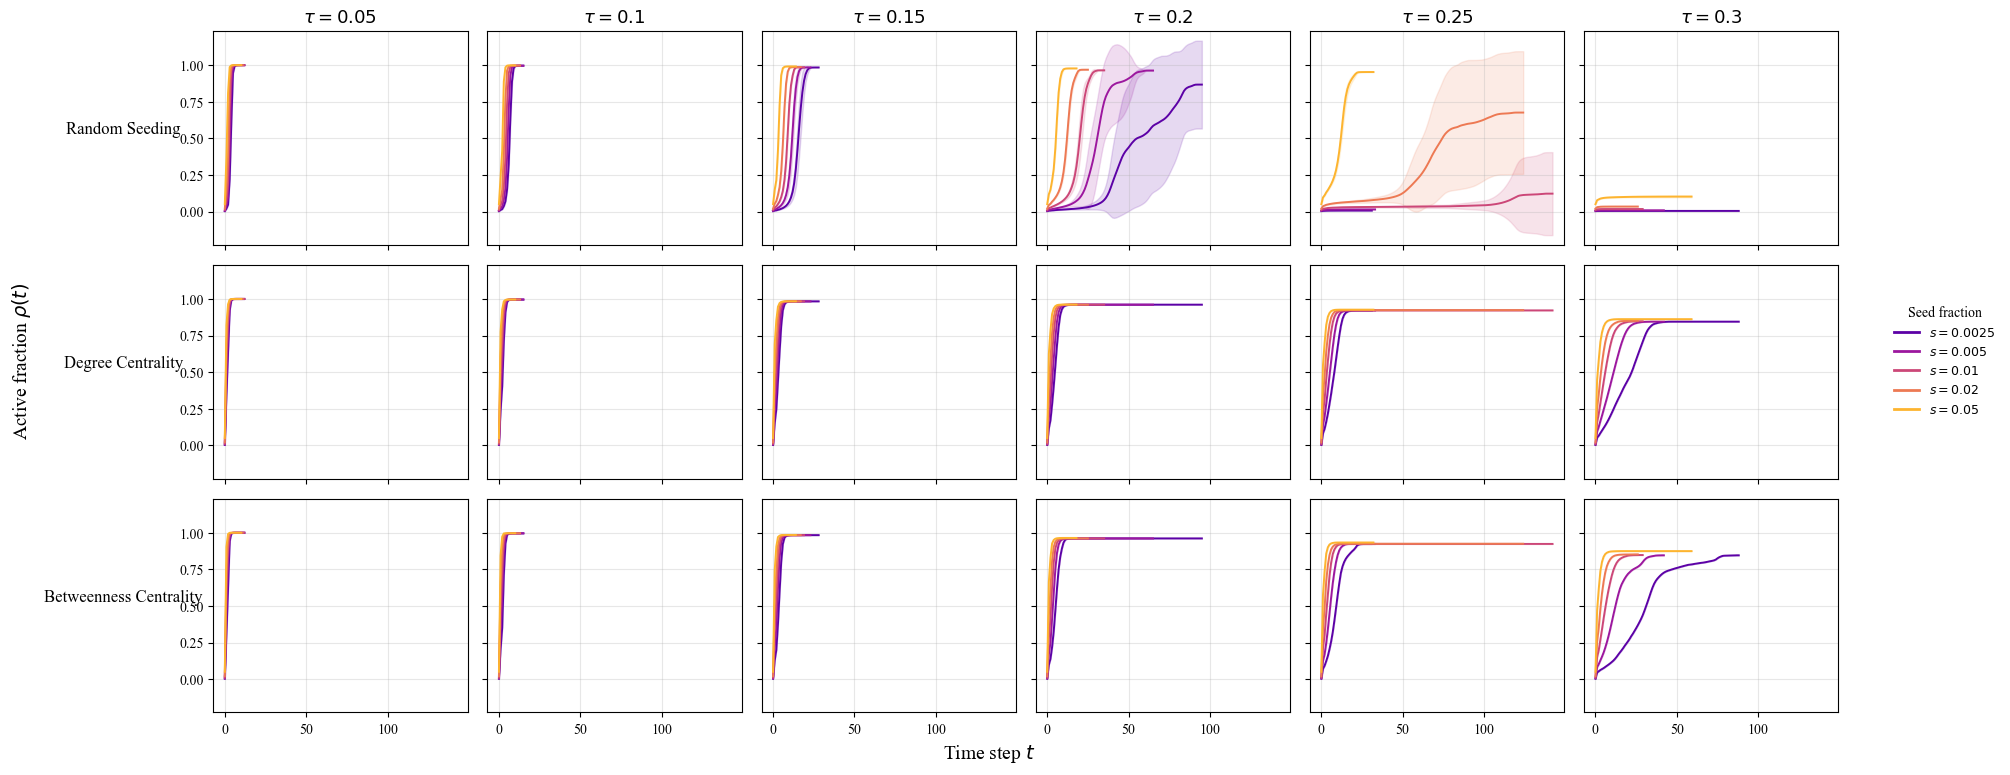

In [11]:
tau_values_to_plot = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30]
seed_palette = sns.color_palette("plasma", n_colors=len(seed_fractions))

n_rows = len(strategies)
n_cols = len(tau_values_to_plot)

fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(n_cols * 3.2, n_rows * 2.6),
    sharex=True, sharey=True
)

for i, strat in enumerate(strategies):
    for j, tau_val in enumerate(tau_values_to_plot):

        ax = axes[i, j]

        # Plot all seed fractions for this (strategy, tau)
        for sf, colour in zip(seed_fractions, seed_palette):
            
            sub = mean_curves_df[
                (mean_curves_df['tau'] == tau_val) &
                (mean_curves_df['strategy'] == strat) &
                (mean_curves_df['seed_fraction'] == sf)
            ].sort_values('time_step')

            # Line
            ax.plot(
                sub['time_step'],
                sub['mean_fraction'],
                color=colour,
                linewidth=1.4,
            )

            # ±1 std band
            ax.fill_between(
                sub['time_step'],
                sub['mean_fraction'] - sub['std_fraction'],
                sub['mean_fraction'] + sub['std_fraction'],
                color=colour,
                alpha=0.15
            )

        # Column titles: tau values
        if i == 0:
            ax.set_title(rf'$\tau={tau_val:g}$', fontsize=13)

        # Row labels: strategy names
        if j == 0:
            ax.set_ylabel(strategy_labels[strat], fontsize=12, rotation=0, labelpad=40)

        ax.grid(alpha=0.3)

# Global axis labels
fig.text(0.5, -0.01, r'Time step $t$', ha='center', fontsize=14)
fig.text(-0.01, 0.5, r'Active fraction $\rho(t)$', va='center',
         rotation='vertical', fontsize=14)

# Single legend for seed fractions
handles = [plt.Line2D([0], [0], color=c, lw=2) for c in seed_palette]
labels = [rf'$s={sf:g}$' for sf in seed_fractions]

fig.legend(
    handles, labels,
    title='Seed fraction',
    loc='center right',
    bbox_to_anchor=(1.03, 0.5),
    frameon=False
)

plt.tight_layout(rect=[0, 0, 0.95, 0.97])
fig.savefig('adoption_curves_grid_by_strategy.png', dpi=300, bbox_inches='tight')
plt.show()


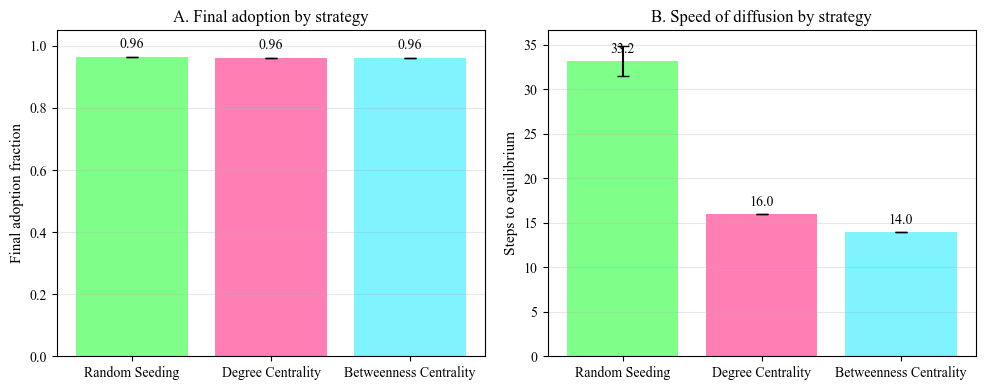

In [30]:
tau_focus = 0.20
seed_focus = 0.01

focus_df = aggregate_df[
    (aggregate_df['tau'] == tau_focus) &
    (aggregate_df['seed_fraction'] == seed_focus)
]

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# final adoption by strategy
ax1 = axes[0]

means_final = []
stds_final = []
labels = []
colors = []

for strat in strategies:
    sub = focus_df[focus_df['strategy'] == strat]
    if sub.empty:
        continue
    means_final.append(sub['mean_final_fraction'].iloc[0])
    stds_final.append(sub['std_final_fraction'].iloc[0])
    labels.append(strategy_labels[strat])
    colors.append(strategy_colors[strat])

x = np.arange(len(labels))
bars = ax1.bar(
    x, means_final, yerr=stds_final,
    color=colors, alpha=0.8, capsize=4
)
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=0)
ax1.set_ylabel('Final adoption fraction')
ax1.set_title('A. Final adoption by strategy')
ax1.set_ylim(0, 1.05)
ax1.grid(axis='y', alpha=0.3)

for bar, val in zip(bars, means_final):
    ax1.text(
        bar.get_x() + bar.get_width()/2, val + 0.02,
        f'{val:.2f}', ha='center', va='bottom'
    )

# steps to equilibrium by strategy
ax2 = axes[1]

means_steps = []
stds_steps = []

for strat in strategies:
    sub = focus_df[focus_df['strategy'] == strat]
    if sub.empty:
        continue
    means_steps.append(sub['mean_n_steps'].iloc[0])
    stds_steps.append(sub['std_n_steps'].iloc[0])

bars2 = ax2.bar(
    x, means_steps, yerr=stds_steps,
    color=colors, alpha=0.8, capsize=4
)
ax2.set_xticks(x)
ax2.set_xticklabels(labels, rotation=0)
ax2.set_ylabel('Steps to equilibrium')
ax2.set_title('B. Speed of diffusion by strategy')
ax2.grid(axis='y', alpha=0.3)

for bar, val in zip(bars2, means_steps):
    ax2.text(
        bar.get_x() + bar.get_width()/2, val + 0.5,
        f'{val:.1f}', ha='center', va='bottom'
    )

plt.tight_layout()
plt.savefig('strategy_comparison_tau20_s001.png', dpi=300, bbox_inches='tight')
plt.show()


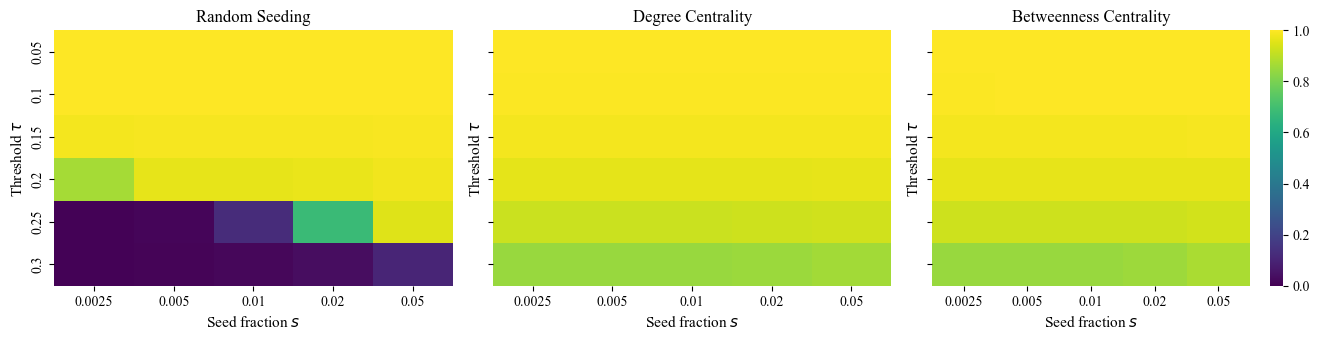

In [35]:
n_strat = len(strategies)
fig, axes = plt.subplots(1, n_strat, figsize=(4.5 * n_strat, 3.5), sharey=True)

if n_strat == 1:
    axes = [axes]

for ax, strat in zip(axes, strategies):
    sub = aggregate_df[aggregate_df['strategy'] == strat]
    pivot = sub.pivot_table(
        index='tau',
        columns='seed_fraction',
        values='mean_final_fraction',
    ).sort_index().sort_index(axis=1)

    sns.heatmap(
        pivot,
        ax=ax,
        vmin=0.0,
        vmax=1.0,
        cmap='viridis',
        cbar=(ax is axes[-1]),
    )

    ax.set_title(strategy_labels[strat])
    ax.set_xlabel(r'Seed fraction $s$')
    ax.set_ylabel(r'Threshold $\tau$')

plt.tight_layout()
fig.savefig('final_adoption_heatmaps.png', bbox_inches='tight')
